In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

Variables
---------

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp
                where gggg indicates a group the passenger is travelling with 
                and pp is their number within the group. People in a group are often family members, but not always.
                
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. 
            Passengers in cryosleep are confined to their cabins.
            
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Versions
--------
1. Exploratory Data Analysis
2. Nothing much
3. First Submission Score -> 0.79588 

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

seed: int = 1042

def set_seed(random_seed: int) -> None:
    np.random.seed(random_seed)
    tf.random.set_seed(random_seed)

set_seed(random_seed = seed)


def get_data(filename: str) -> pd.DataFrame:
    return pd.read_csv(f"/kaggle/input/spaceship-titanic/{filename}")

Exploratory Data Analysis
-------------------------

In [3]:
titanic = get_data(filename = "train.csv")
titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot:>

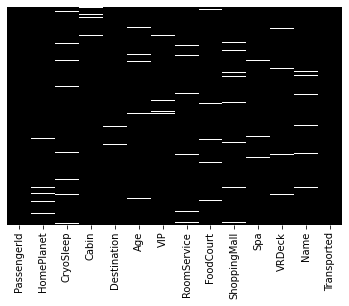

In [4]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='cubehelix')

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

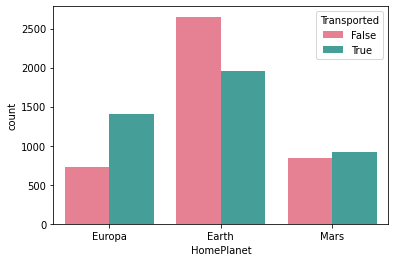

In [5]:
# HomePlanet
sns.countplot(data = titanic, x="HomePlanet", hue="Transported", palette="husl") # Majority of people came from earch

In [6]:
earth = titanic.loc[titanic['HomePlanet'] == "Earth"]
europa = titanic.loc[titanic['HomePlanet'] == "Europa"]
mars = titanic.loc[titanic['HomePlanet'] == "Mars"]

nt_transported_earth, transported_earth = earth["Transported"].value_counts()
nt_transported_europa, transported_europa = europa["Transported"].value_counts()
nt_transported_mars, transported_mars = mars["Transported"].value_counts()

total_earth = nt_transported_earth + transported_earth
total_europa = nt_transported_europa + transported_europa
total_mars = nt_transported_mars + transported_mars

print(f"Proportion of transported people: Earth -> {transported_earth/total_earth: .5}, Europa -> {transported_europa/total_europa: .5}, Mars: {transported_mars/total_mars: .5}")
# Europa had the proportion of least number of transported people, while Mars had the most

Proportion of transported people: Earth ->  0.42395, Europa ->  0.34115, Mars:  0.47698


<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

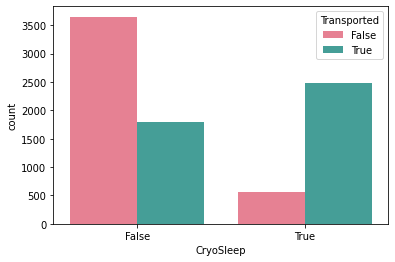

In [7]:
# CryoSleep
sns.countplot(data = titanic, x="CryoSleep", hue="Transported", palette="husl")

In [8]:
titanic["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

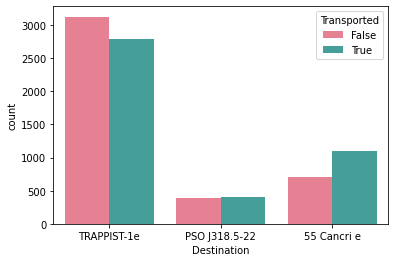

In [9]:
#Destination
sns.countplot(data = titanic, x="Destination", hue="Transported", palette="husl")

<AxesSubplot:xlabel='Destination', ylabel='count'>

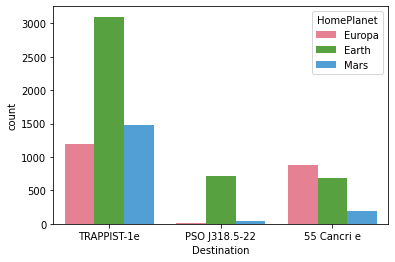

In [10]:
sns.countplot(data = titanic, x="Destination", hue="HomePlanet", palette="husl")

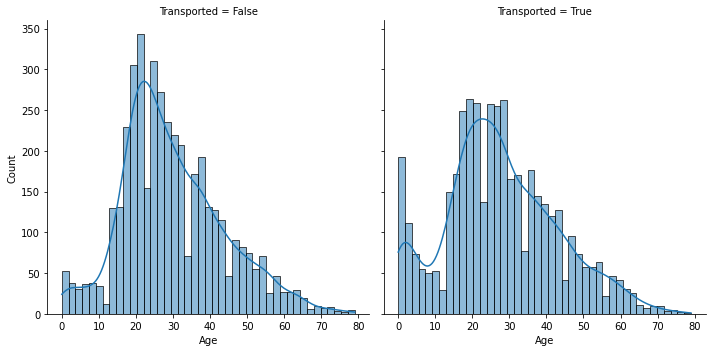

In [11]:
sns.displot(data=titanic, x="Age", col="Transported", kde=True, palette="husl")

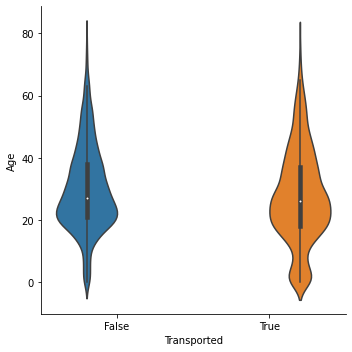

In [12]:
sns.catplot(data=titanic, kind="violin", x="Transported", y="Age", hue="Transported")

In [13]:
age_transported = titanic.loc[titanic["Transported"] == True]["Age"]
nt_age_transported = titanic.loc[titanic["Transported"] == False]["Age"]

mean_age_transported, median_age_transported = age_transported.mean(), age_transported.median()
mean_age_nt_transported, median_age_nt_transported = nt_age_transported.mean(), nt_age_transported.median()

print(f"Transported Age Cohort;  mean -> {mean_age_transported} : median-> {median_age_transported}")
print(f"Not Transported Age Cohort; mean -> {mean_age_nt_transported} : median-> {median_age_transported}")

Transported Age Cohort;  mean -> 27.74883395522388 : median-> 26.0
Not Transported Age Cohort; mean -> 29.922858495030763 : median-> 26.0


In [14]:
# Is there a difference in mean between the transported passengers and those not transported
# t-test
# H0: There is no difference in mean between the age of transported passengers and those not transported
# H1: There is a difference in mean between the age of transported passengers and those not transported
from scipy.stats import ttest_ind

tmp_transported = titanic.loc[titanic["Transported"] == True]
tmp_nt_transported = titanic.loc[titanic["Transported"] == False]

ttest_ind(tmp_transported.dropna()["Age"], tmp_nt_transported.dropna()["Age"], equal_var=False)

Ttest_indResult(statistic=-6.737105207364544, pvalue=1.7534342946470257e-11)

p-value <<< 0.001, we can reject the null hypothesis. 
It can be concluded from this that Age if a very important variable for out analysis.

In [15]:
titanic["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

<AxesSubplot:xlabel='VIP', ylabel='count'>

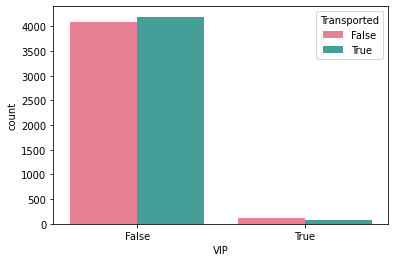

In [16]:
sns.countplot(data = titanic, x="VIP", hue="Transported", palette="husl")

In [17]:
def get_stats(df, planet, attribute):
    return df.loc[df["HomePlanet"] == planet][attribute].mean(), df.loc[df["HomePlanet"] == planet][attribute].median()

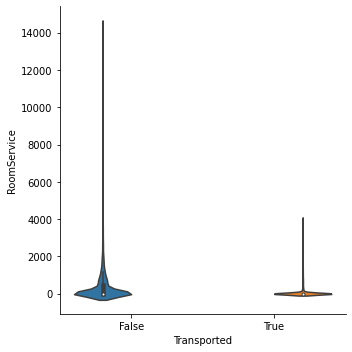

In [18]:
sns.catplot(data=titanic, kind="violin", x="Transported", y="RoomService", hue="Transported")

In [19]:
transported = titanic.loc[titanic["Transported"] == True]
nt_transported = titanic.loc[titanic["Transported"] == False]

mean_earth_room_transported, median_earth_room_transported = get_stats(transported, "Earth", "RoomService")
mean_earth_room_nt_transported, median_earth_room_nt_transported = get_stats(nt_transported, "Earth", "RoomService")

mean_mars_room_transported, median_mars_room_transported = get_stats(transported, "Europa", "RoomService")
mean_mars_room_nt_transported, median_mars_room_nt_transported = get_stats(nt_transported, "Europa", "RoomService")

mean_europa_room_transported, median_europa_room_transported = get_stats(transported, "Mars", "RoomService")
mean_europa_room_nt_transported, median_europa_room_nt_transported = get_stats(nt_transported, "Mars", "RoomService")

print("Transported Room Service Account")
print("--------------------------------------------------------------------------------------------------")
print(f"Earth: mean -> {mean_earth_room_transported} : median -> {median_earth_room_transported}")
print(f"Europa: mean -> {mean_europa_room_transported} : median -> {median_europa_room_transported}")
print(f"Mars: mean -> {mean_mars_room_transported} : median -> {median_mars_room_transported}")
print()
print("Not Transported Room Service Account")
print("--------------------------------------------------------------------------------------------------")
print(f"Earth: mean -> {mean_earth_room_nt_transported} : median -> {median_earth_room_nt_transported}")
print(f"Europa: mean -> {mean_europa_room_nt_transported} : median -> {median_europa_room_nt_transported}")
print(f"Mars: mean -> {mean_mars_room_nt_transported} : median -> {median_mars_room_nt_transported}")

Transported Room Service Account
--------------------------------------------------------------------------------------------------
Earth: mean -> 56.36820083682009 : median -> 0.0
Europa: mean -> 113.04894327030033 : median -> 0.0
Mars: mean -> 38.78916967509025 : median -> 0.0

Not Transported Room Service Account
--------------------------------------------------------------------------------------------------
Earth: mean -> 196.48936992655587 : median -> 0.0
Europa: mean -> 1032.7803398058252 : median -> 806.0
Mars: mean -> 352.8704225352113 : median -> 0.0


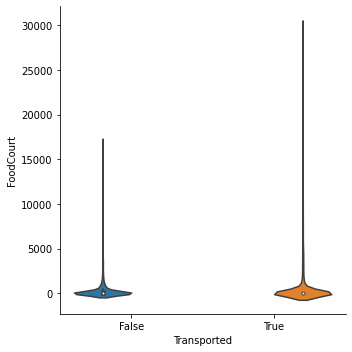

In [20]:
sns.catplot(data=titanic, kind="violin", x="Transported", y="FoodCourt", hue="Transported")

In [21]:
mean_earth_food_transported, median_earth_food_transported = get_stats(transported, "Earth", "FoodCourt")
mean_earth_food_nt_transported, median_earth_food_nt_transported = get_stats(nt_transported, "Earth", "FoodCourt")

mean_mars_food_transported, median_mars_food_transported = get_stats(transported, "Europa", "FoodCourt")
mean_mars_food_nt_transported, median_mars_food_nt_transported = get_stats(nt_transported, "Europa", "FoodCourt")

mean_europa_food_transported, median_europa_food_transported = get_stats(transported, "Mars", "FoodCourt")
mean_europa_food_nt_transported, median_europa_food_nt_transported = get_stats(nt_transported, "Mars", "FoodCourt")

print("Transported Food Court Account")
print("--------------------------------------------------------------------------------------------------")
print(f"Earth: mean -> {mean_earth_food_transported} : median -> {median_earth_food_transported}")
print(f"Europa: mean -> {mean_europa_food_transported} : median -> {median_europa_food_transported}")
print(f"Mars: mean -> {mean_mars_food_transported} : median -> {median_mars_food_transported}")
print()
print("Not Transported Food Court Account")
print("--------------------------------------------------------------------------------------------------")
print(f"Earth: mean -> {mean_earth_food_nt_transported} : median -> {median_earth_food_nt_transported}")
print(f"Europa: mean -> {mean_europa_food_nt_transported} : median -> {median_europa_food_nt_transported}")
print(f"Mars: mean -> {mean_mars_food_nt_transported} : median -> {median_mars_food_nt_transported}")

Transported Food Court Account
--------------------------------------------------------------------------------------------------
Earth: mean -> 168.40574412532638 : median -> 0.0
Europa: mean -> 38.568080357142854 : median -> 0.0
Mars: mean -> 1386.6339677891654 : median -> 0.0

Not Transported Food Court Account
--------------------------------------------------------------------------------------------------
Earth: mean -> 114.17722007722007 : median -> 0.0
Europa: mean -> 71.51515151515152 : median -> 0.0
Mars: mean -> 1724.6968011126564 : median -> 847.0


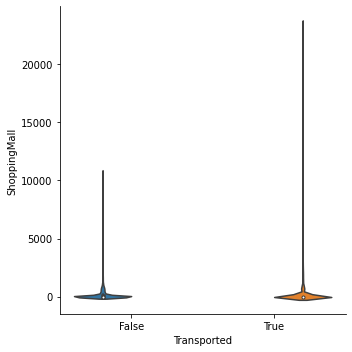

In [22]:
sns.catplot(data=titanic, kind="violin", x="Transported", y="ShoppingMall", hue="Transported")

In [23]:
mean_earth_shop_transported, median_earth_shop_transported = get_stats(transported, "Earth", "ShoppingMall")
mean_earth_shop_nt_transported, median_earth_shop_nt_transported = get_stats(nt_transported, "Earth", "ShoppingMall")

mean_mars_shop_transported, median_mars_shop_transported = get_stats(transported, "Europa", "ShoppingMall")
mean_mars_shop_nt_transported, median_mars_shop_nt_transported = get_stats(nt_transported, "Europa", "ShoppingMall")

mean_europa_shop_transported, median_europa_shop_transported = get_stats(transported, "Mars", "ShoppingMall")
mean_europa_shop_nt_transported, median_europa_shop_nt_transported = get_stats(nt_transported, "Mars", "ShoppingMall")

print("Transported Shopping Mall Account")
print("--------------------------------------------------------------------------------------------------")
print(f"Earth: mean -> {mean_earth_shop_transported} : median -> {median_earth_shop_transported}")
print(f"Europa: mean -> {mean_europa_shop_transported} : median -> {median_europa_shop_transported}")
print(f"Mars: mean -> {mean_mars_shop_transported} : median -> {median_mars_shop_transported}")
print()
print("Not Transported Shopping Mall Account")
print("--------------------------------------------------------------------------------------------------")
print(f"Earth: mean -> {mean_earth_shop_nt_transported} : median -> {median_earth_shop_nt_transported}")
print(f"Europa: mean -> {mean_europa_shop_nt_transported} : median -> {median_europa_shop_nt_transported}")
print(f"Mars: mean -> {mean_mars_shop_nt_transported} : median -> {median_mars_shop_nt_transported}")

Transported Shopping Mall Account
--------------------------------------------------------------------------------------------------
Earth: mean -> 168.88771744860307 : median -> 0.0
Europa: mean -> 261.0755555555556 : median -> 0.0
Mars: mean -> 145.4835646457268 : median -> 0.0

Not Transported Shopping Mall Account
--------------------------------------------------------------------------------------------------
Earth: mean -> 108.25607404550713 : median -> 0.0
Europa: mean -> 360.24787363304984 : median -> 109.0
Mars: mean -> 162.04090267983074 : median -> 0.0


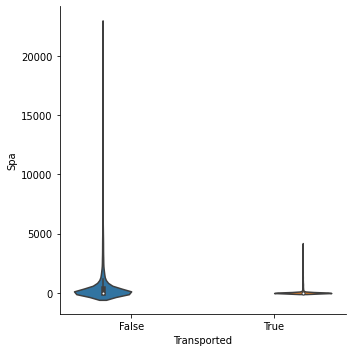

In [24]:
sns.catplot(data=titanic, kind="violin", x="Transported", y="Spa", hue="Transported")

In [25]:
mean_earth_spa_transported, median_earth_spa_transported = get_stats(transported, "Earth", "Spa")
mean_earth_spa_nt_transported, median_earth_spa_nt_transported = get_stats(nt_transported, "Earth", "Spa")

mean_mars_spa_transported, median_mars_spa_transported = get_stats(transported, "Europa", "Spa")
mean_mars_spa_nt_transported, median_mars_spa_nt_transported = get_stats(nt_transported, "Europa", "Spa")

mean_europa_spa_transported, median_europa_spa_transported = get_stats(transported, "Mars", "Spa")
mean_europa_spa_nt_transported, median_europa_spa_nt_transported = get_stats(nt_transported, "Mars", "Spa")

print("Transported Spa Account")
print("--------------------------------------------------------------------------------------------------")
print(f"Earth: mean -> {mean_earth_spa_transported} : median -> {median_earth_spa_transported}")
print(f"Europa: mean -> {mean_europa_spa_transported} : median -> {median_europa_spa_transported}")
print(f"Mars: mean -> {mean_mars_spa_transported} : median -> {median_mars_spa_transported}")
print()
print("Not Transported Spa Account")
print("--------------------------------------------------------------------------------------------------")
print(f"Earth: mean -> {mean_earth_spa_nt_transported} : median -> {median_earth_spa_nt_transported}")
print(f"Europa: mean -> {mean_europa_spa_nt_transported} : median -> {median_europa_spa_nt_transported}")
print(f"Mars: mean -> {mean_mars_spa_nt_transported} : median -> {median_mars_spa_nt_transported}")

Transported Spa Account
--------------------------------------------------------------------------------------------------
Earth: mean -> 39.71413612565445 : median -> 0.0
Europa: mean -> 10.695121951219512 : median -> 0.0
Mars: mean -> 126.40975254730714 : median -> 0.0

Not Transported Spa Account
--------------------------------------------------------------------------------------------------
Earth: mean -> 218.70111839568068 : median -> 0.0
Europa: mean -> 219.5676004872107 : median -> 0.0
Mars: mean -> 2240.669943820225 : median -> 1186.5


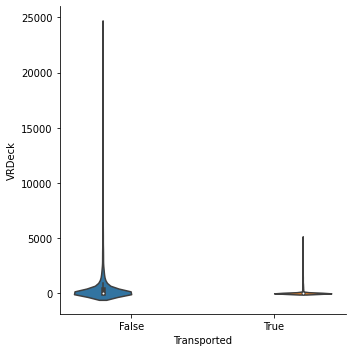

In [26]:
sns.catplot(data=titanic, kind="violin", x="Transported", y="VRDeck", hue="Transported")

In [27]:
mean_earth_deck_transported, median_earth_deck_transported = get_stats(transported, "Earth", "VRDeck")
mean_earth_deck_nt_transported, median_earth_deck_nt_transported = get_stats(nt_transported, "Earth", "VRDeck")

mean_mars_deck_transported, median_mars_deck_transported = get_stats(transported, "Europa", "VRDeck")
mean_mars_deck_nt_transported, median_mars_deck_nt_transported = get_stats(nt_transported, "Europa", "VRDeck")

mean_europa_deck_transported, median_europa_deck_transported = get_stats(transported, "Mars", "VRDeck")
mean_europa_deck_nt_transported, median_europa_deck_nt_transported = get_stats(nt_transported, "Mars", "VRDeck")

print("Transported Spa Account")
print("--------------------------------------------------------------------------------------------------")
print(f"Earth: mean -> {mean_earth_deck_transported} : median -> {median_earth_deck_transported}")
print(f"Europa: mean -> {mean_europa_deck_transported} : median -> {median_europa_deck_transported}")
print(f"Mars: mean -> {mean_mars_deck_transported} : median -> {median_mars_deck_transported}")
print()
print("Not Transported Spa Account")
print("--------------------------------------------------------------------------------------------------")
print(f"Earth: mean -> {mean_earth_deck_nt_transported} : median -> {median_earth_deck_nt_transported}")
print(f"Europa: mean -> {mean_europa_deck_nt_transported} : median -> {median_europa_deck_nt_transported}")
print(f"Mars: mean -> {mean_mars_deck_nt_transported} : median -> {median_mars_deck_nt_transported}")

Transported Spa Account
--------------------------------------------------------------------------------------------------
Earth: mean -> 44.0514705882353 : median -> 0.0
Europa: mean -> 8.071428571428571 : median -> 0.0
Mars: mean -> 141.3098693759071 : median -> 0.0

Not Transported Spa Account
--------------------------------------------------------------------------------------------------
Earth: mean -> 207.37572477773483 : median -> 0.0
Europa: mean -> 90.25 : median -> 0.0
Mars: mean -> 2289.286312849162 : median -> 1221.0


In [28]:
titanic['Deck'] =  titanic['Cabin'].str.split('/').str[0]
titanic['Num'] =  titanic['Cabin'].str.split('/').str[1]
titanic['Port'] =  titanic['Cabin'].str.split('/').str[-1]

titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Port
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [29]:
print(titanic["Deck"].value_counts())

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64


<AxesSubplot:xlabel='Deck', ylabel='count'>

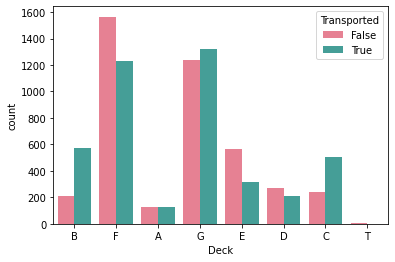

In [30]:
sns.countplot(data = titanic, x="Deck", hue="Transported", palette="husl")

<AxesSubplot:xlabel='Deck', ylabel='count'>

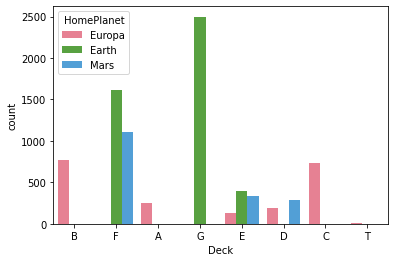

In [31]:
sns.countplot(data = titanic, x="Deck", hue="HomePlanet", palette="husl")

In [32]:
print(titanic["Num"].value_counts())

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Num, Length: 1817, dtype: int64


In [33]:
print(titanic["Port"].value_counts())

S    4288
P    4206
Name: Port, dtype: int64


<AxesSubplot:xlabel='Port', ylabel='count'>

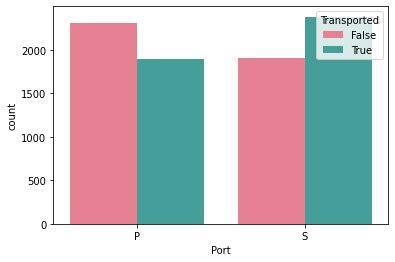

In [34]:
sns.countplot(data = titanic, x="Port", hue="Transported", palette="husl")

In [35]:
def add_column(df, column):
    df[f"{column}_present"] = np.where(df[column] != 'NaN', 1, 0)
    return df

<AxesSubplot:xlabel='Destination', ylabel='count'>

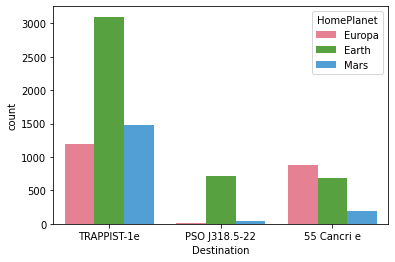

In [36]:
sns.countplot(data = titanic, x="Destination", hue="HomePlanet", palette="husl")

In [37]:
cols = titanic.columns[titanic.isna().any()].tolist()
for col in cols:
    titianic = add_column(titanic, col)

In [38]:
titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VIP_present,RoomService_present,FoodCourt_present,ShoppingMall_present,Spa_present,VRDeck_present,Name_present,Deck_present,Num_present,Port_present
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,1,1,1,1,1,1,1,1,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,1,1,1,1,1,1,1,1,1,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1,1,1,1,1,1,1,1,1,1


In [39]:
median_age = titanic["Age"].median()
titanic.loc[titanic['Age'].isnull(), 'Age'] = median_age

In [40]:
mode_planet = list(titanic["HomePlanet"].mode())[0]
titanic["HomePlanet"] = titanic['HomePlanet'].replace(np.nan, mode_planet)

In [41]:
mean_room_earth = titanic.loc[titanic["HomePlanet"].str.lower() == "earth"]["RoomService"].mean()
mean_room_europa = titanic.loc[titanic["HomePlanet"].str.lower() == "mars"]["RoomService"].mean()
mean_room_mars = titanic.loc[titanic["HomePlanet"].str.lower() == "europa"]["RoomService"].mean()

titanic.loc[(titanic['RoomService'].isnull()) & (titanic["HomePlanet"].str.lower() == 'earth'), 'RoomService'] = mean_room_earth
titanic.loc[(titanic['RoomService'].isnull()) & (titanic["HomePlanet"].str.lower() == 'europa'), 'RoomService'] = mean_room_europa
titanic.loc[(titanic['RoomService'].isnull()) & (titanic["HomePlanet"].str.lower() == 'mars'), 'RoomService'] = mean_room_mars

In [42]:
mean_food_earth = titanic.loc[titanic["HomePlanet"].str.lower() == "earth"]["FoodCourt"].mean()
mean_food_europa = titanic.loc[titanic["HomePlanet"].str.lower() == "mars"]["FoodCourt"].mean()
mean_food_mars = titanic.loc[titanic["HomePlanet"].str.lower() == "europa"]["FoodCourt"].mean()

titanic.loc[(titanic['FoodCourt'].isnull()) & (titanic["HomePlanet"].str.lower() == 'earth'), 'FoodCourt'] = mean_food_earth
titanic.loc[(titanic['FoodCourt'].isnull()) & (titanic["HomePlanet"].str.lower() == 'europa'), 'FoodCourt'] = mean_food_europa
titanic.loc[(titanic['FoodCourt'].isnull()) & (titanic["HomePlanet"].str.lower() == 'mars'), 'FoodCourt'] = mean_food_mars

In [43]:
mean_shop_earth = titanic.loc[titanic["HomePlanet"].str.lower() == "earth"]["ShoppingMall"].mean()
mean_shop_europa = titanic.loc[titanic["HomePlanet"].str.lower() == "mars"]["ShoppingMall"].mean()
mean_shop_mars = titanic.loc[titanic["HomePlanet"].str.lower() == "europa"]["ShoppingMall"].mean()

titanic.loc[(titanic['ShoppingMall'].isnull()) & (titanic["HomePlanet"].str.lower() == 'earth'), 'ShoppingMall'] = mean_shop_earth
titanic.loc[(titanic['ShoppingMall'].isnull()) & (titanic["HomePlanet"].str.lower() == 'europa'), 'ShoppingMall'] = mean_shop_europa
titanic.loc[(titanic['ShoppingMall'].isnull()) & (titanic["HomePlanet"].str.lower() == 'mars'), 'ShoppingMall'] = mean_shop_mars

In [44]:
mean_spa_earth = titanic.loc[titanic["HomePlanet"].str.lower() == "earth"]["Spa"].mean()
mean_spa_europa = titanic.loc[titanic["HomePlanet"].str.lower() == "mars"]["Spa"].mean()
mean_spa_mars = titanic.loc[titanic["HomePlanet"].str.lower() == "europa"]["Spa"].mean()

titanic.loc[(titanic['Spa'].isnull()) & (titanic["HomePlanet"].str.lower() == 'earth'), 'Spa'] = mean_spa_earth
titanic.loc[(titanic['Spa'].isnull()) & (titanic["HomePlanet"].str.lower() == 'europa'), 'Spa'] = mean_spa_europa
titanic.loc[(titanic['Spa'].isnull()) & (titanic["HomePlanet"].str.lower() == 'mars'), 'Spa'] = mean_spa_mars

In [45]:
mean_deck_earth = titanic.loc[titanic["HomePlanet"].str.lower() == "earth"]["VRDeck"].mean()
mean_deck_europa = titanic.loc[titanic["HomePlanet"].str.lower() == "mars"]["VRDeck"].mean()
mean_deck_mars = titanic.loc[titanic["HomePlanet"].str.lower() == "europa"]["VRDeck"].mean()

titanic.loc[(titanic['VRDeck'].isnull()) & (titanic["HomePlanet"].str.lower() == 'earth'), 'VRDeck'] = mean_deck_earth
titanic.loc[(titanic['VRDeck'].isnull()) & (titanic["HomePlanet"].str.lower() == 'europa'), 'VRDeck'] = mean_deck_europa
titanic.loc[(titanic['VRDeck'].isnull()) & (titanic["HomePlanet"].str.lower() == 'mars'), 'VRDeck'] = mean_deck_mars

In [46]:
destination_mode_earth = list(titanic.loc[titanic["HomePlanet"].str.lower() == "earth"]["Destination"].mode())[0]
destination_mode_europa = list(titanic.loc[titanic["HomePlanet"].str.lower() == "europa"]["Destination"].mode())[0]
destination_mode_mars = list(titanic.loc[titanic["HomePlanet"].str.lower() == "mars"]["Destination"].mode())[0]

titanic.loc[(titanic['Destination'].isnull()) & (titanic["HomePlanet"].str.lower() == 'earth'), 'Destination'] = destination_mode_earth
titanic.loc[(titanic['Destination'].isnull()) & (titanic["HomePlanet"].str.lower() == 'europa'), 'Destination'] = destination_mode_europa
titanic.loc[(titanic['Destination'].isnull()) & (titanic["HomePlanet"].str.lower() == 'mars'), 'Destination'] = destination_mode_mars

In [47]:
titanic.columns[titanic.isna().any()].tolist()

['CryoSleep', 'Cabin', 'VIP', 'Name', 'Deck', 'Num', 'Port']

In [48]:
titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VIP_present,RoomService_present,FoodCourt_present,ShoppingMall_present,Spa_present,VRDeck_present,Name_present,Deck_present,Num_present,Port_present
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,1,1,1,1,1,1,1,1,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,1,1,1,1,1,1,1,1,1,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1,1,1,1,1,1,1,1,1,1


In [49]:
titanic = titanic.drop(["PassengerId", "Name", "Cabin", "Name_present", "Num"], axis=1)
titanic.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Age_present,VIP_present,RoomService_present,FoodCourt_present,ShoppingMall_present,Spa_present,VRDeck_present,Deck_present,Num_present,Port_present
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,1,1,1,1,1,1,1,1,1,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,1,1,1,1,1,1,1,1,1,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,1,1,1,1,1,1,1,1,1,1
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,1,1,1,1,1,1,1,1,1,1


Preparing for training
----------------------

In [50]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(titanic, test_size=0.2, shuffle=True, stratify=titanic[["HomePlanet", "Destination", "Transported"]])

In [51]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder, FunctionTransformer


numeric_features = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Age"]
categorical_features = ["HomePlanet", "Destination", "Deck", "Port", "CryoSleep", "VIP"]
# categorical_features = ["Sex", "SibSp", "Parch", "Embarked", "title", "Embarked_present", "Age_present"]

numeric_transformer = Pipeline([("scaler", RobustScaler())])
categorical_transformer = OneHotEncoder(handle_unknown="error")
ordinal_transformer = OrdinalEncoder(handle_unknown="error")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
#         ("ord", ordinal_transformer, ordinal_features),
    ]
)

In [52]:
y_train, y_test = train["Transported"], test["Transported"]
del train["Transported"]
del test["Transported"]

Setting-up a baseline: Logistic Regression
------------------------------------------

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

logit = Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", LogisticRegression(max_iter=500, random_state=seed, n_jobs=-1))])
logit.fit(train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['RoomService', 'FoodCourt',
                                                   'ShoppingMall', 'Spa',
                                                   'VRDeck', 'Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['HomePlanet', 'Destination',
                                                   'Deck', 'Port', 'CryoSleep',
                                                   'VIP'])])),
                ('sampling', SMOTE()),
                ('classifier',
                 LogisticRegression(max_iter=500, n_jobs=-1,
                                    random_state=1042))])

In [54]:
logit.score(train, y_train)

0.7923497267759563

In [55]:
logit.score(test, y_test)

0.7826336975273146

Moving to an advanced classifier: LightGBM
------------------------------------------

In [56]:
from lightgbm import LGBMClassifier

rt = 0.2

lgbm = Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", LGBMClassifier(objective="binary", learning_rate=rt, n_jobs=-1, random_state=seed))])
lgbm.fit(train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['RoomService', 'FoodCourt',
                                                   'ShoppingMall', 'Spa',
                                                   'VRDeck', 'Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['HomePlanet', 'Destination',
                                                   'Deck', 'Port', 'CryoSleep',
                                                   'VIP'])])),
                ('sampling', SMOTE()),
                ('classifier',
                 LGBMClassifier(learning_rate=0.2, objective='binary',
                                random_state=1042))])

In [57]:
lgbm.score(train, y_train)

0.904515386827725

In [58]:
lgbm.score(test, y_test)

0.7987349051178838

Making Predictions (Adding new features to set)
-----------------------------------------------

In [59]:
titanic_test = get_data("test.csv")
titanic_test.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


In [60]:
titanic_test['Deck'] =  titanic_test['Cabin'].str.split('/').str[0]
titanic_test['Num'] =  titanic_test['Cabin'].str.split('/').str[1]
titanic_test['Port'] =  titanic_test['Cabin'].str.split('/').str[-1]

In [61]:
for col in cols:
    titianic_test = add_column(titanic_test, col)
titanic_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VIP_present,RoomService_present,FoodCourt_present,ShoppingMall_present,Spa_present,VRDeck_present,Name_present,Deck_present,Num_present,Port_present
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,1,1,1,1,1,1,1,1,1,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,1,1,1,1,1,1,1,1,1,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,1,1,1,1,1,1,1,1,1,1


In [62]:
titanic_test.loc[titanic_test['Age'].isnull(), 'Age'] = median_age
titanic_test["HomePlanet"] = titanic_test['HomePlanet'].replace(np.nan, mode_planet)

titanic_test.loc[(titanic_test['RoomService'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'earth'), 'RoomService'] = mean_room_earth
titanic_test.loc[(titanic_test['RoomService'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'europa'), 'RoomService'] = mean_room_europa
titanic_test.loc[(titanic_test['RoomService'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'mars'), 'RoomService'] = mean_room_mars

titanic_test.loc[(titanic_test['FoodCourt'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'earth'), 'FoodCourt'] = mean_food_earth
titanic_test.loc[(titanic_test['FoodCourt'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'europa'), 'FoodCourt'] = mean_food_europa
titanic_test.loc[(titanic_test['FoodCourt'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'mars'), 'FoodCourt'] = mean_food_mars

titanic_test.loc[(titanic_test['ShoppingMall'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'earth'), 'ShoppingMall'] = mean_shop_earth
titanic_test.loc[(titanic_test['ShoppingMall'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'europa'), 'ShoppingMall'] = mean_shop_europa
titanic_test.loc[(titanic_test['ShoppingMall'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'mars'), 'ShoppingMall'] = mean_shop_mars

titanic_test.loc[(titanic_test['Spa'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'earth'), 'Spa'] = mean_spa_earth
titanic_test.loc[(titanic_test['Spa'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'europa'), 'Spa'] = mean_spa_europa
titanic_test.loc[(titanic_test['Spa'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'mars'), 'Spa'] = mean_spa_mars

titanic_test.loc[(titanic_test['VRDeck'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'earth'), 'VRDeck'] = mean_deck_earth
titanic_test.loc[(titanic_test['VRDeck'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'europa'), 'VRDeck'] = mean_deck_europa
titanic_test.loc[(titanic_test['VRDeck'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'mars'), 'VRDeck'] = mean_deck_mars

titanic_test.loc[(titanic_test['Destination'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'earth'), 'Destination'] = destination_mode_earth
titanic_test.loc[(titanic_test['Destination'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'europa'), 'Destination'] = destination_mode_europa
titanic_test.loc[(titanic_test['Destination'].isnull()) & (titanic_test["HomePlanet"].str.lower() == 'mars'), 'Destination'] = destination_mode_mars

titanic_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VIP_present,RoomService_present,FoodCourt_present,ShoppingMall_present,Spa_present,VRDeck_present,Name_present,Deck_present,Num_present,Port_present
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,1,1,1,1,1,1,1,1,1,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,1,1,1,1,1,1,1,1,1,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,1,1,1,1,1,1,1,1,1,1


In [63]:
titanic_test = titanic_test.drop(["PassengerId", "Name", "Cabin", "Name_present", "Num"], axis=1)

In [64]:
y = titanic["Transported"]
del titanic["Transported"]

In [65]:
lgbm = Pipeline(steps=[("preprocessor", preprocessor), ("sampling", SMOTE()), ("classifier", LGBMClassifier(objective="binary", learning_rate=rt, n_jobs=-1, random_state=seed))])
lgbm.fit(titanic, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['RoomService', 'FoodCourt',
                                                   'ShoppingMall', 'Spa',
                                                   'VRDeck', 'Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['HomePlanet', 'Destination',
                                                   'Deck', 'Port', 'CryoSleep',
                                                   'VIP'])])),
                ('sampling', SMOTE()),
                ('classifier',
                 LGBMClassifier(learning_rate=0.2, objective='binary',
                                random_state=1042))])

In [66]:
lgbm.score(titanic, y)

0.8896813528126079

In [67]:
y_preds = lgbm.predict(titanic_test)

In [68]:
output = get_data("sample_submission.csv")
output["Transported"] = y_preds

output.to_csv("submission.csv", index=False)

In [69]:
output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
